In [61]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [62]:
#Read Top Tracks File into a DataFrame
top_tracks_df = pd.read_csv('../Music-Research-Project-1/Resources/top_tracks_genre.csv')

In [63]:
#Get Column Names to Trim
top_tracks_df.columns

Index(['Unnamed: 0', 'Artist', 'Track', 'Track ID', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'Genre',
       'Genre ID', 'Spotify ID'],
      dtype='object')

In [64]:
#Create DataFrame of Cleaned Statistics
top_tracks_cleaned = top_tracks_df.loc[:,['Artist', 'Track', 'danceability', 'energy',
       'key', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'Genre'
       ]]

In [65]:
#Round statistics for readability
top_tracks_cleaned['danceability'] = top_tracks_cleaned['danceability'].round(2)
top_tracks_cleaned['energy'] = top_tracks_cleaned['energy'].round(2)
top_tracks_cleaned['speechiness'] = top_tracks_cleaned['speechiness'].round(2)
top_tracks_cleaned['acousticness'] = top_tracks_cleaned['acousticness'].round(2)
top_tracks_cleaned['instrumentalness'] = top_tracks_cleaned['instrumentalness'].round(2)
top_tracks_cleaned['liveness'] = top_tracks_cleaned['liveness'].round(2)
top_tracks_cleaned['valence'] = top_tracks_cleaned['valence'].round(2)
top_tracks_cleaned['tempo'] = top_tracks_cleaned['tempo'].round(0)

In [66]:
#Create a new column to replace duration in milliseconds
top_tracks_cleaned['Length (mins)'] = (top_tracks_cleaned['duration_ms'] / 1000 / 60).round(2)
top_tracks_cleaned.drop('duration_ms', axis=1, inplace=True)

In [67]:
#Rename columns for consistency
top_tracks_cleaned.rename(columns={'danceability':'Danceability', 'energy':'Energy',
       'key': 'Key', 'speechiness': 'Speechiness', 'acousticness':'Acousticness',
       'instrumentalness':'Instrumentalness', 'liveness':'Liveness', 'valence':'Valence', 'tempo':'Tempo', 'time_signature': 'Time Signature'}, inplace=True)

In [68]:
#Check cleaned product before statistical analysis
top_tracks_cleaned.head(1)

,Artist,Track,Danceability,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Genre,Length (mins)
0,Michael Jackson,Billie Jean,0.92,0.65,11.0,0.04,0.02,0.02,0.04,0.85,117.0,4.0,Pop,4.9


In [69]:
grouped_genres = top_tracks_cleaned.groupby('Genre')

In [77]:
score_columns = ['Danceability','Energy','Speechiness','Acousticness','Instrumentalness','Liveness','Valence']

<AxesSubplot:>

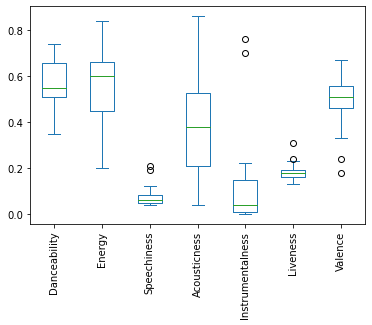

In [78]:
#BoxPlot of Means
grouped_genres[score_columns].mean().round(2).plot(kind='box',rot=90)

<AxesSubplot:>

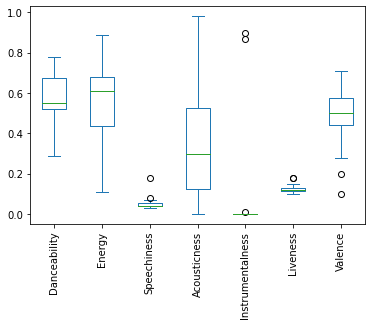

In [79]:
#BoxPlot of Medians
grouped_genres[score_columns].median().round(2).plot(kind='box',rot=90)

<AxesSubplot:xlabel='Length (mins)', ylabel='Tempo'>

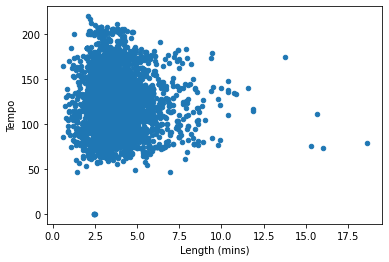

In [85]:
#Length vs. Tempo (without outlier of 60 min song)
top_tracks_cleaned.loc[top_tracks_cleaned['Length (mins)']<20].plot(x='Length (mins)',y='Tempo',kind='scatter')